<h1 style="color:rgb(0,120,170)">Assignment 3: PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Implementation of PCA for a standard data set from scratch: </h2>

The goal of this task is to implement the PCA algorithm as introduced in the slides by hand. PCA analysis is a powerful tool to identify patterns in data; it is used to find correlations between variables, to determine the directions of maximum variance and project it onto a smaller dimensional subspace that maintains most of the information. To fix the overall notation, we will denote by $n$ the number of samples, by $d$ the number of different features, and $k<d$ the dimension of the space, on which we want to project. We will work with the famous iris dataset which contains measurements for $n=150$ iris flowers from three different classes, namely:

* Iris-setosa ($n_{\textrm{se}}=50$)
* Iris-versicolor ($n_{\textrm{ve}}=50$)
* Iris-virginica ($n_{\textrm{vi}}=50$).

Moreover, we have the following $d=4$ features:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

<img src = "iris_with_labels.jpg">

For more information on the dataset go to https://archive.ics.uci.edu/ml/datasets/Iris.

In the next step we want to read in the data set using the pandas package.

In [1]:
# Imports and reading data set. Nothing to do here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    filepath_or_buffer='iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [2]:
# Split data table into data X and class labels y. Nothing to do here.
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

Our iris dataset is now an $n \times d=150 \times 4$ matrix $\mathbf{X}$, where the columns are the different features, and every row is an individual flower sample. Each sample row $\mathbf{x}_i$ for $1\le i \le n=150$ is as a $4$-dimensional vector.

<h3 style="color:rgb(210,90,80)">Exercise 1 (10 points):</h3>

* To get a feeling for how the 3 different flower classes are distributed along the 4 different features, visualize them via histograms.

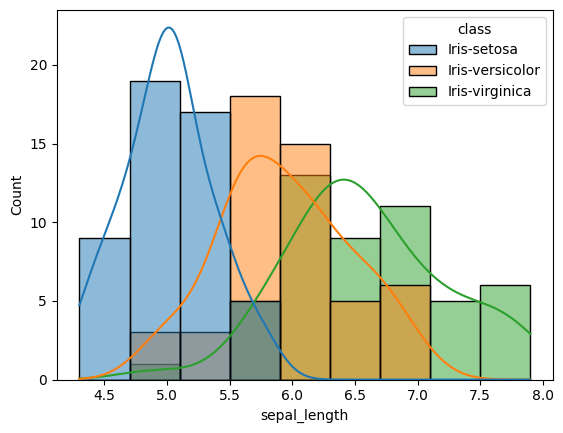

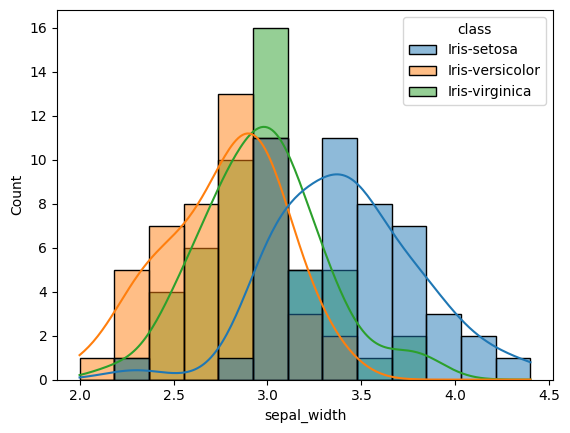

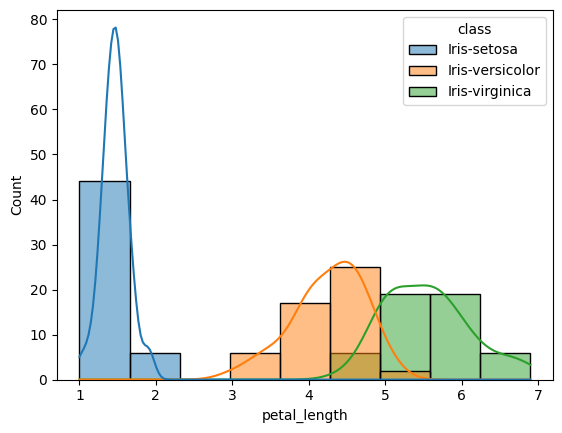

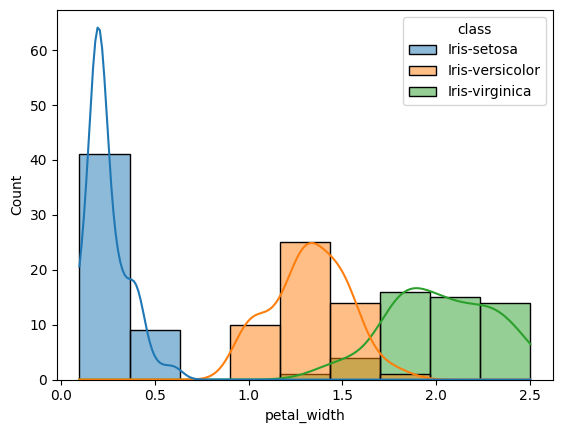

In [3]:
df_features = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_labels = pd.DataFrame(y, columns=['class'])
df_combined = pd.concat([df_features, df_labels], axis=1)
sns.histplot(data=df_combined, x='sepal_length', hue='class', kde=True)
plt.show()
sns.histplot(data=df_combined, x='sepal_width', hue='class', kde=True)
plt.show()
sns.histplot(data=df_combined, x='petal_length', hue='class', kde=True)
plt.show()
sns.histplot(data=df_combined, x='petal_width', hue='class', kde=True)
plt.show()

As PCA leads to a (sub)space that maximizes the variance along the axes, it makes sense to standardize the data, especially, if they were measured on different scales. We thus transform the data onto unit scale (mean=0 and variance=1), which is needed in many machine learning algorithms.

In [4]:
#nothing to do here
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Next, we compute the covariance matrix $\mathbf{C}$, which is a $d×d$ matrix (real and symmetric), where each element represents the covariance between two features. $\mathbf{C}$ can therefore be calculated as follows:
$$
c_{jk}=\frac{1}{n-1} \sum_{i=1}^{n} (x_i^{(j)}-\overline{x}^{(j)})(x_i^{(k)}-\overline{x}^{(k)}),
$$
where $\overline{x}^{(j)}$ denotes the mean of the $j$-th feature. In matrix notation, this can be expressed as follows:
$$
\mathbf{C}=\frac{1}{n-1}(\mathbf{X}-\overline{\mathbf{x}})^T (\mathbf{X}-\overline{\mathbf{x}}),
$$
with $\overline{\mathbf{x}}= \frac1n \sum_{i=1}^{n} \mathbf{x}_i$ denoting the mean vector. The eigenvectors and eigenvalues of $\mathbf{C}$ represent the most important part of PCA: The eigenvectors (principal components, German: "Hauptachsen") determine the directions of the new feature space, and the eigenvalues contain information about their importance. Put differently, the eigenvalues explain the variance of the data along the new feature axes. Computing $\mathbf{C}$ and its eigendecomposition should therefore be achieved in the following tasks: 

<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>


* Using the previous formulas and explanations, implement the covariance matrix for the iris data set and print the result. Don't use the np.cov function. Verify first that all the feature means are zero due to the standardization we did above.

In [5]:
# Verify that all the feature means are zero
print(np.mean(X_std, axis=0))

# Compute the covariance matrix
mean_vector = np.mean(X_std, axis=0)
X_centered = X_std - mean_vector
cov_matrix = (1 / (X_centered.shape[0] - 1)) * np.dot(X_centered.T, X_centered)

print(cov_matrix)

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

* Next, perform an eigendecomposition on the covariance matrix  and print the eigenvectors and eigenvalues. You can use whatever method you like.

In [12]:
C = np.cov(X_std.T)  # Compute covariance matrix
eig_vals, eig_vecs = np.linalg.eig(C)  # Perform eigendecomposition
print("Eigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


To decide which eigenvector(s) can safely be dropped, we take a more careful look at the corresponding eigenvalues: In order to do so, we rank the eigenvalues from highest to lowest and choose the top $k$ eigenvectors. The eigenvectors with the lowest eigenvalues contain the least information about the distribution of the data; these are the ones we will get rid of.

<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Make a list of (eigenvalue, eigenvector) tuples, sort the (eigenvalue, eigenvector) tuples from high to low (with respect to the eigenvalues) and print the tuples in decreasing order to confirm, that the list is correctly sorted. Also check that the eigenvectors are all normalized and all orthogonal to each other.

In [15]:
# Perform eigendecomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(C)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low (with respect to the eigenvalues)
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Print the sorted (eigenvalue, eigenvector) tuples in decreasing order
print("Sorted eigenvalues:")
for i in eig_pairs:
    print(i[0])

# Check if eigenvectors are normalized and orthogonal
for i in range(len(eig_pairs)):
    vec1 = eig_pairs[i][1]
    norm1 = np.linalg.norm(vec1)
    if not np.isclose(norm1, 1.0): 
      f"Eigenvector {i} is not normalized"
    for j in range(i+1, len(eig_pairs)):
        vec2 = eig_pairs[j][1]
        dot_prod = np.dot(vec1, vec2)
        if not np.isclose(dot_prod, 0.0):
           f"Eigenvectors {i} and {j} are not orthogonal"

Sorted eigenvalues:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


After sorting the eigenpairs, we ask ourselves, how many principal components we want to have. A useful measure is the so-called "explained variance", which can be calculated from the eigenvalues by computing the ratios $\frac{\lambda_j}{\sum_{k=1}^d \lambda_k}$, where $\lambda_j$ denotes the $j$-th (sorted) eigenvalue of $\mathbf{C}$ and $1\le j \le d$. The explained variance tells us how much information is contained in each of the principal components. 

<h3 style="color:rgb(210,90,80)">Exercise 5 (10 points):</h3>

* Write a code that computes the explained variance for each eigenvalue of the iris-dataset example and print the result.

In [18]:
total_variance = sum(eig_vals)
explained_variance = [(i / total_variance) for i in sorted(eig_vals, reverse=True)]

print("Explained variance:", explained_variance)

Explained variance: [0.7277045209380135, 0.2303052326768065, 0.03683831957627379, 0.005151926808906321]


The previous task clearly shows that most of the variance can be explained by the first principal component alone. The second principal component still contains some information, while the third and fourth principal components can safely be neglected. 

Next, we come to the construction of the $d \times k$ transformation (and projection) matrix $\mathbf{W}$ that will be used to transform the Iris data onto the new (and smaller) feature subspace. It basically just consists of the first $k$ eigenvectors. In our Iris dataset example, we choose to reduce the $4$-dimensional feature space to a $k=2$ dimensional one.

In the final, step we will use $\mathbf{W}$ to transform our samples onto the new subspace via the equation
$\mathbf{Y}=\mathbf{X}\,\mathbf{W}$, where $\mathbf{Y}$ is now an $n \times k$ matrix (i.e. $150 \times 2$ in our case).

<h3 style="color:rgb(210,90,80)">Exercise 6 (10 points):</h3>

* Write a code that computes the transformation matrix $\mathbf{W}$ and the new representation matrix $\mathbf{Y}$ for the Iris data set and print the results.

In [20]:
# create transformation matrix W
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

# create new representation matrix Y
Y = X_std.dot(W)

print("Transformation matrix W:\n", W)
print("\nNew representation matrix Y:\n", Y)

Transformation matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]

New representation matrix Y:
 [[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793

All the steps that we did so far can be also done with the following implemented algorithm from the sklearn package. The previously computed matrix $\mathbf{Y}$ should match $\mathbf{Y}_\textrm{sklearn}$ from the following code. Note that signs (of individual components) might differ. This is because the directions of the eigenvectors are not fixed and different methods may make different choices.

In [21]:
#nothing to do here
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

* As a final step, we provide a visualization of the data in the new coordinate system, consisting of the first two principal components as axes. It should be clearly visible how the different classes are well seperated also in this smaller subspace. The self-implementation and sklearn method should lead to the same results (apart from potential flip of axes directions).

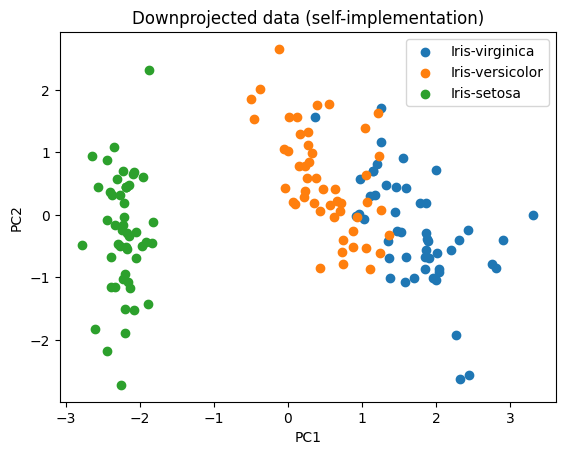

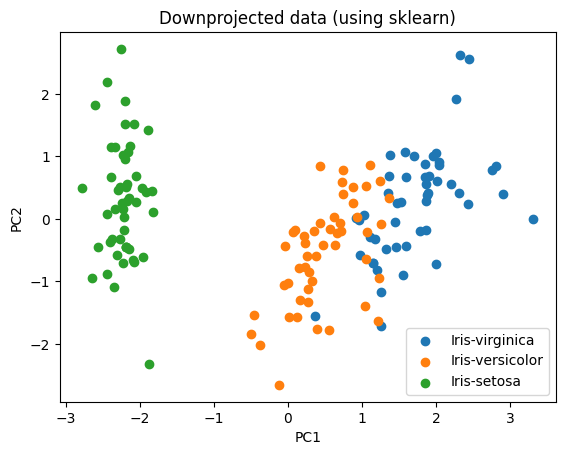

In [22]:
#nothing to do here
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
classes = list(set(y))

colors = sns.color_palette(n_colors=len(classes)).as_hex()

for index,c in enumerate(classes):
        plt.scatter(Y[y==c,0], Y[y==c,1], color=colors[index], label=c)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Downprojected data (self-implementation)")
plt.legend()
plt.show()

for index,c in enumerate(classes):
        plt.scatter(Y_sklearn[y==c,0], Y_sklearn[y==c,1], color=colors[index], label=c)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Downprojected data (using sklearn)")
plt.legend()
plt.show()